<a href="https://colab.research.google.com/github/ywateba/fds_2023_project/blob/main/fds_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from collections import Counter
import seaborn as sns

warnings.filterwarnings('ignore')


## 1.1 Import Data

In [2]:
# Directory containing all datasets
directory = './dataset_nba'

# List of CSV files in the directory
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Dictionary to memorize DataFrames
dataframes = {}

# Importa i file CSV e assegna loro nomi basati sul titolo del file
for file_name in csv_files:
    # Estrai il titolo del file (senza l'estensione .csv)
    title = os.path.splitext(file_name)[0]
    
    # Costruisci il percorso completo del file
    file_path = os.path.join(directory, file_name)
    
    # Leggi il file CSV in un DataFrame e assegna il titolo come chiave
    dataframes[title] = pd.read_csv(file_path)
    dataframes[title]['Season'] = str(title[:4])
    

# Ora puoi accedere ai tuoi DataFrame utilizzando i titoli assegnati ai file
# Ad esempio, per accedere al DataFrame del file 'file1.csv':
dataframes['2018-rookies']


,Rk,Player,Debut,Age,Yrs,G,MPTOT,FG,FGA,3P,...,PTSTOT,FG%,3P%,FT%,MP,PTS,TRB,AST,ID,Season
0,1,Bam Adebayo,Oct 18 '17 MIA @ ORL,20,1,69,1368,174,340,0,...,477,0.512,0.000,0.721,19.8,6.9,5.5,1.5,adebaba01,2018
1,2,Jarrett Allen,Oct 20 '17 BRK vs. ORL,19,1,72,1441,234,397,5,...,587,0.589,0.333,0.776,20.0,8.2,5.4,0.7,allenja01,2018
2,3,Kadeem Allen,Dec 11 '17 BOS @ CHI,25,1,18,107,6,22,0,...,19,0.273,0.000,0.778,5.9,1.1,0.6,0.7,allenka01,2018
3,4,Ike Anigbogu,Oct 20 '17 IND vs. POR,19,1,11,30,4,9,0,...,13,0.444,NaN,0.833,2.7,1.2,0.8,0.0,anigbik01,2018
4,5,OG Anunoby,Oct 19 '17 TOR vs. CHI,20,1,74,1481,163,346,73,...,438,0.471,0.371,0.629,20.0,5.9,2.5,0.7,anunoog01,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,Matt Williams,Dec 23 '17 MIA vs. NOP,24,1,3,11,2,6,1,...,5,0.333,0.200,NaN,3.7,1.7,0.3,0.0,willima05,2018
116,117,D.J. Wilson,Oct 20 '17 MIL vs. CLE,21,1,22,71,9,16,2,...,21,0.563,0.400,0.500,3.2,1.0,0.5,0.1,wilsodj01,2018
117,118,Jamil Wilson,Nov 20 '17 LAC @ NYK,27,1,15,274,38,81,27,...,105,0.469,0.429,0.500,18.3,7.0,2.1,0.7,wilsoja02,2018
118,119,Guerschon Yabusele,Oct 20 '17 BOS @ PHI,22,1,33,235,26,61,12,...,79,0.426,0.324,0.682,7.1,2.4,1.6,0.5,yabusgu01,2018


In [3]:
rookies_id = dict()
for year in range(2018, 2024):
    rookies_id[year] = dataframes.get(f'{year}-rookies')['ID'].tolist()

rookies_id

{2018: ['adebaba01',
  'allenja01',
  'allenka01',
  'anigbik01',
  'anunoog01',
  'arcidry01',
  'artisja01',
  'bacondw01',
  'balllo01',
  'belljo01',
  'birchkh01',
  'birdja01',
  'blakean01',
  'bogdabo01',
  'bouchch01',
  'bradlto01',
  'brookdi01',
  'brownst02',
  'bryanth01',
  'carusal01',
  'cavanty01',
  'clavegi01',
  'clevean01',
  'collijo01',
  'colliza01',
  'colliky01',
  'cookech01',
  'costema01',
  'craigto01',
  'dorsety01',
  'dotsoda01',
  'doylemi01',
  'doziepj01',
  'evansja01',
  'fergute01',
  'foxde01',
  'fultzma01',
  'grayjo01',
  'hamilda02',
  'harrish01',
  'hartjo01',
  'hayesni01',
  'hearnre01',
  'henrymy01',
  'hicksis01',
  'hollajo02',
  'huntevi01',
  'ingraan01',
  'isaacjo01',
  'iwundwe01',
  'jacksaa01',
  'jacksjo02',
  'jacksju01',
  'jamesmi02',
  'johnsda04',
  'johnsom01',
  'jonesja04',
  'kennalu01',
  'klebima01',
  'korkmfu01',
  'kornelu01',
  'kuzmaky01',
  'leaftj01',
  'leeda03',
  'lemonwa01',
  'lydonty01',
  'magetjo01',

In [4]:
df_final = pd.DataFrame()

for year_rookie in range(2018, 2024):
    for year_player in range(year_rookie, 2024):
        df_att = dataframes.get(f'{year_player}-players')
        df_att = df_att[df_att['ID'].isin(rookies_id[year_rookie])]
        df_final = pd.concat([df_att, df_final], ignore_index=True)

df_final

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Season
0,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,agbajoc01,2023
1,20,Patrick Baldwin Jr.,SF,20,GSW,31,0,7.3,1.4,3.5,...,1.3,1.3,0.4,0.2,0.1,0.4,0.5,3.9,baldwpa01,2023
2,23,Paolo Banchero,PF,20,ORL,72,72,33.8,6.7,15.6,...,5.7,6.9,3.7,0.8,0.5,2.8,2.2,20.0,banchpa01,2023
3,26,Dominick Barlow,PF,19,SAS,28,0,14.6,1.6,3.1,...,2.0,3.6,0.9,0.4,0.7,0.5,2.0,3.9,barlodo01,2023
4,37,MarJon Beauchamp,SF,22,MIL,52,11,13.5,1.8,4.7,...,1.5,2.2,0.7,0.4,0.1,0.9,1.4,5.1,beaucma01,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,522,Matt Williams,SG,24,MIA,3,0,3.7,0.7,2.0,...,0.3,0.3,0.0,0.0,0.0,0.3,0.3,1.7,willima05,2018
1955,524,D.J. Wilson,PF,21,MIL,22,0,3.2,0.4,0.7,...,0.4,0.5,0.1,0.1,0.0,0.2,0.3,1.0,wilsodj01,2018
1956,525,Jamil Wilson,SF,27,LAC,15,10,18.3,2.5,5.4,...,1.9,2.1,0.7,0.3,0.5,0.5,2.3,7.0,wilsoja02,2018
1957,531,Guerschon Yabusele,PF,22,BOS,33,4,7.1,0.8,1.8,...,1.1,1.6,0.5,0.1,0.2,0.4,0.7,2.4,yabusgu01,2018


Eliminiamo le righe relative ai giocatori che hanno cambiato squadra nell'arco della stagione, mantenendo solo la riga relativa alle statistiche delle 2 o più squadre in cui ha militato.

In [5]:
condition = (df_final['Tm'] != 'TOT') & df_final.duplicated(subset=['ID', 'Season'], keep=False)

# Applica le condizioni utilizzando il metodo loc
df = df_final.loc[~condition]
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Season
0,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,agbajoc01,2023
1,20,Patrick Baldwin Jr.,SF,20,GSW,31,0,7.3,1.4,3.5,...,1.3,1.3,0.4,0.2,0.1,0.4,0.5,3.9,baldwpa01,2023
2,23,Paolo Banchero,PF,20,ORL,72,72,33.8,6.7,15.6,...,5.7,6.9,3.7,0.8,0.5,2.8,2.2,20.0,banchpa01,2023
3,26,Dominick Barlow,PF,19,SAS,28,0,14.6,1.6,3.1,...,2.0,3.6,0.9,0.4,0.7,0.5,2.0,3.9,barlodo01,2023
4,37,MarJon Beauchamp,SF,22,MIL,52,11,13.5,1.8,4.7,...,1.5,2.2,0.7,0.4,0.1,0.9,1.4,5.1,beaucma01,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,522,Matt Williams,SG,24,MIA,3,0,3.7,0.7,2.0,...,0.3,0.3,0.0,0.0,0.0,0.3,0.3,1.7,willima05,2018
1955,524,D.J. Wilson,PF,21,MIL,22,0,3.2,0.4,0.7,...,0.4,0.5,0.1,0.1,0.0,0.2,0.3,1.0,wilsodj01,2018
1956,525,Jamil Wilson,SF,27,LAC,15,10,18.3,2.5,5.4,...,1.9,2.1,0.7,0.3,0.5,0.5,2.3,7.0,wilsoja02,2018
1957,531,Guerschon Yabusele,PF,22,BOS,33,4,7.1,0.8,1.8,...,1.1,1.6,0.5,0.1,0.2,0.4,0.7,2.4,yabusgu01,2018


In [6]:
df_sorted = df.sort_values(by=['ID', 'Season'])
pd.set_option('display.max_rows', None)

df_sorted['Season'] = df_sorted['Season'] = df_sorted['Season'].astype(int)
df_sorted.head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Season
496,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,achiupr01,2021
403,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,achiupr01,2022
339,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,achiupr01,2023
1343,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2,adamsja01,2019
1172,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,...,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,adamsja01,2021
1830,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,adebaba01,2018
1736,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9,adebaba01,2019
1663,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,adebaba01,2020
1582,4,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,...,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,adebaba01,2021
1514,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,adebaba01,2022


Only first 3 seasons.

In [7]:
pd.set_option('display.max_rows', None)
df = df_sorted.groupby('Player').head(3)
season_counts = df.groupby('Player')['Season'].count()
season_counts
selected_players = season_counts[season_counts >= 3].index
season_counts
selected_rows = df[df['Player'].isin(selected_players)]
df_final = selected_rows
df_final.head(30)
# Counter(df_final['Player'].tolist())

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Season
496,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,achiupr01,2021
403,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,achiupr01,2022
339,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,achiupr01,2023
1830,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,adebaba01,2018
1736,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9,adebaba01,2019
1663,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,adebaba01,2020
915,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,alexani01,2020
795,7,Nickeil Alexander-Walker,SG,22,NOP,46,13,21.9,4.2,10.0,...,2.8,3.1,2.2,1.0,0.5,1.5,1.9,11.0,alexani01,2021
683,6,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,...,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6,alexani01,2022
1347,10,Grayson Allen,SG,23,UTA,38,2,10.9,1.8,4.7,...,0.5,0.6,0.7,0.2,0.2,0.9,1.2,5.6,allengr01,2019


Let's add the information about the year.

In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 496 to 1735
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      792 non-null    int64  
 1   Player  792 non-null    object 
 2   Pos     792 non-null    object 
 3   Age     792 non-null    int64  
 4   Tm      792 non-null    object 
 5   G       792 non-null    int64  
 6   GS      792 non-null    int64  
 7   MP      792 non-null    float64
 8   FG      792 non-null    float64
 9   FGA     792 non-null    float64
 10  FG%     791 non-null    float64
 11  3P      792 non-null    float64
 12  3PA     792 non-null    float64
 13  3P%     749 non-null    float64
 14  2P      792 non-null    float64
 15  2PA     792 non-null    float64
 16  2P%     788 non-null    float64
 17  eFG%    791 non-null    float64
 18  FT      792 non-null    float64
 19  FTA     792 non-null    float64
 20  FT%     763 non-null    float64
 21  ORB     792 non-null    float64
 22 

In [9]:
years = [i % 3 + 1 for i in range(df_final.shape[0])]
df_final['Year'] = years
df_final.head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Season,Year
496,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,3.4,0.5,0.3,0.5,0.7,1.5,5.0,achiupr01,2021,1
403,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,6.5,1.1,0.5,0.6,1.2,2.1,9.1,achiupr01,2022,2
339,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,6.0,0.9,0.6,0.5,1.1,1.9,9.2,achiupr01,2023,3
1830,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,5.5,1.5,0.5,0.6,1.0,2.0,6.9,adebaba01,2018,1
1736,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,7.3,2.2,0.9,0.8,1.5,2.5,8.9,adebaba01,2019,2
1663,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,10.2,5.1,1.1,1.3,2.8,2.5,15.9,adebaba01,2020,3
915,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,1.8,1.9,0.4,0.2,1.1,1.2,5.7,alexani01,2020,1
795,7,Nickeil Alexander-Walker,SG,22,NOP,46,13,21.9,4.2,10.0,...,3.1,2.2,1.0,0.5,1.5,1.9,11.0,alexani01,2021,2
683,6,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,...,2.9,2.4,0.7,0.4,1.4,1.6,10.6,alexani01,2022,3
1347,10,Grayson Allen,SG,23,UTA,38,2,10.9,1.8,4.7,...,0.6,0.7,0.2,0.2,0.9,1.2,5.6,allengr01,2019,1


Modifica ruoli

In [10]:
df_final['Pos'].replace('SG-SF', 'SG', inplace=True)
df_final['Pos'].replace('SF-SG', 'SF', inplace=True)
df_final['Pos'].replace('SG-PG', 'SG', inplace=True)
df_final['Pos'].replace('PF-SF', 'PF', inplace=True)
df_final['Pos'].replace('C-PF', 'C', inplace=True)
df_final['Pos'].replace('SF-PF', 'SF', inplace=True)
df_final['Pos'].replace('PF-C', 'PF', inplace=True)

Counter(df_final['Pos'].tolist())

Counter({'PF': 162, 'C': 113, 'SG': 204, 'PG': 152, 'SF': 161})

## 1.2 Analyze data

Analyze positions

In [27]:
#Counter(first_year['Pos'].tolist())

Counter({'SG': 69, 'PF': 60, 'SF': 52, 'PG': 51, 'C': 32})

In [29]:
#list_roles = first_year['Pos'].unique().tolist() # estraggo le differenti posizioni

#PTS_per_season_pos = first_year.groupby(['Season', 'Pos'])['PTS'].mean()
#TRB_per_season_pos = first_year.groupby(['Season', 'Pos'])['TRB'].mean()
#AST_per_season_pos = first_year.groupby(['Season', 'Pos'])['AST'].mean()

#PTS_per_season_pos

Season  Pos
2018    C      4.400000
        PF     6.381818
        PG     6.294118
        SF     6.200000
        SG     6.482353
2019    C      7.900000
        PF     5.472727
        PG     7.007692
        SF     4.966667
        SG     5.529412
2020    C      4.527273
        PF     5.852174
        PG     7.750000
        SF     6.083333
        SG     5.454167
2021    C      4.000000
        PF     4.746667
        PG     7.923077
        SF     7.340000
        SG     7.509091
Name: PTS, dtype: float64

## Correlation Matrix

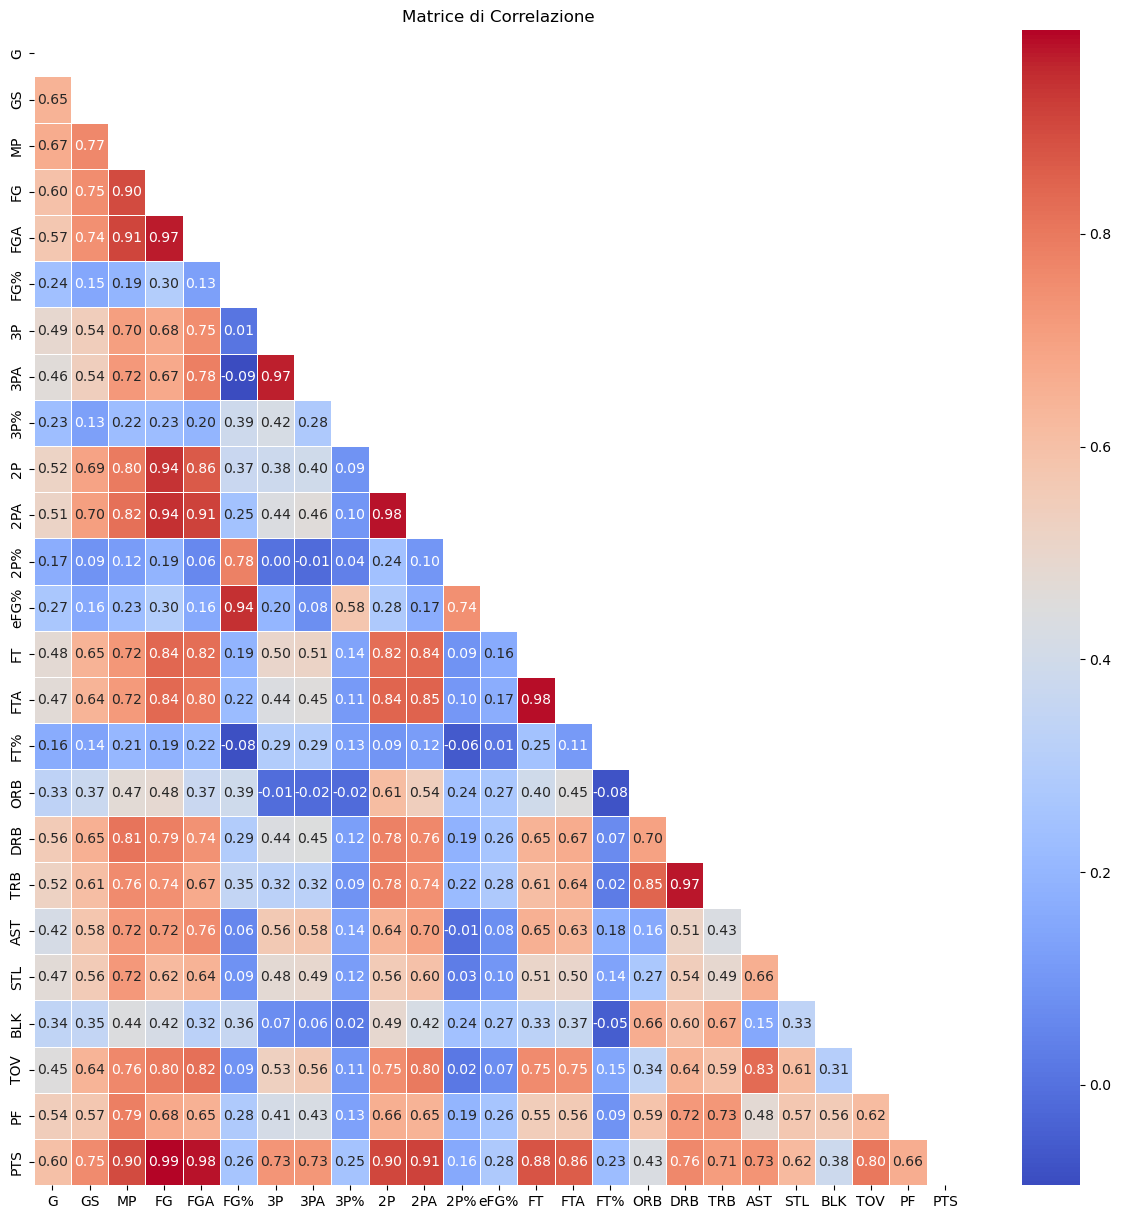

In [13]:


# Creazione di un DataFrame con i tuoi dati
# Supponendo che i tuoi dati siano già presenti in un DataFrame chiamato 'df'

# Creazione di una sottoinsieme del DataFrame con le colonne di interesse
columns_of_interest = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
                        'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

subset_df = df[columns_of_interest]

# Calcolo della matrice di correlazione
correlation_matrix = subset_df.corr()

# Creazione di una matrice con la stessa forma di quella di correlazione ma con valori NaN
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Creazione di un heatmap per visualizzare solo la metà superiore della matrice di correlazione
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title("Matrice di Correlazione")
plt.show()


## Graph to show the differences between the average PTS RBS and AST in year 1,2,3 in NBA

In [24]:
year_1=df_final[df_final["Year"]==1]
year_2=df_final[df_final["Year"]==2]
year_3=df_final[df_final["Year"]==3]

PTS1=year_1["PTS"].mean()
PTS2=year_2["PTS"].mean()
PTS3=year_3["PTS"].mean()
PTS=[PTS1,PTS2,PTS3]

AST1=year_1["AST"].mean()
AST2=year_2["AST"].mean()
AST3=year_3["AST"].mean()
AST=[AST1,AST2,AST3]

REB1=year_1["TRB"].mean()
REB2=year_2["TRB"].mean()
REB3=year_3["TRB"].mean()
REB=[REB1,REB2,REB3]

# We computed the average points rebounds and assists per game respectively in year 1 2 and 3.

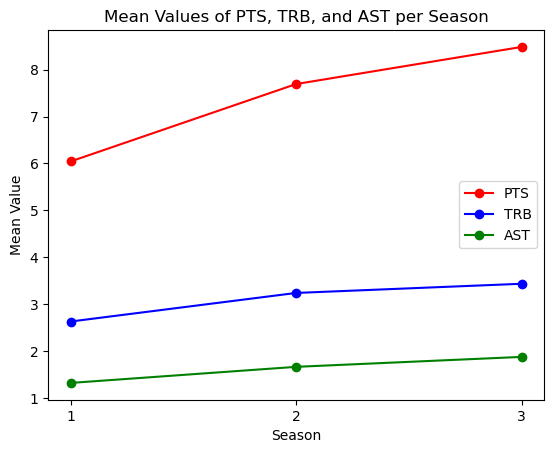

In [31]:
fig, ax1 = plt.subplots()

# Plot the PTS data as a line with red color
ax1.plot([1,2,3], PTS, color='red', label='PTS', marker = 'o')

# Plot the TRB data as a line with blue color
ax1.plot([1,2,3], REB, color='blue', label='TRB', marker = 'o')

# Plot the AST data as a line with green color
ax1.plot([1,2,3], AST, color='green', label='AST', marker = 'o')

plt.xticks([1,2,3])
# Add a legend
ax1.legend(loc='center right')

# Set the x-axis label and y-axis label
ax1.set_xlabel('Season')
ax1.set_ylabel('Mean Value')

# Set the title of the graph
ax1.set_title('Mean Values of PTS, TRB, and AST per Season')
plt.show()

# pt assist rimbalzi

* The graph above shows how the points made the rebounds and assists grow every year. In particular the increase of the points per game is the higher between the three, starting from an average of 6.04 Points per game and reaching the value of 8.48 in year 3.

## Histograms of Points, Rebounds and Assists per game

In [36]:
year_1.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'ID',
       'Season', 'Year'],
      dtype='object')

* Year 1

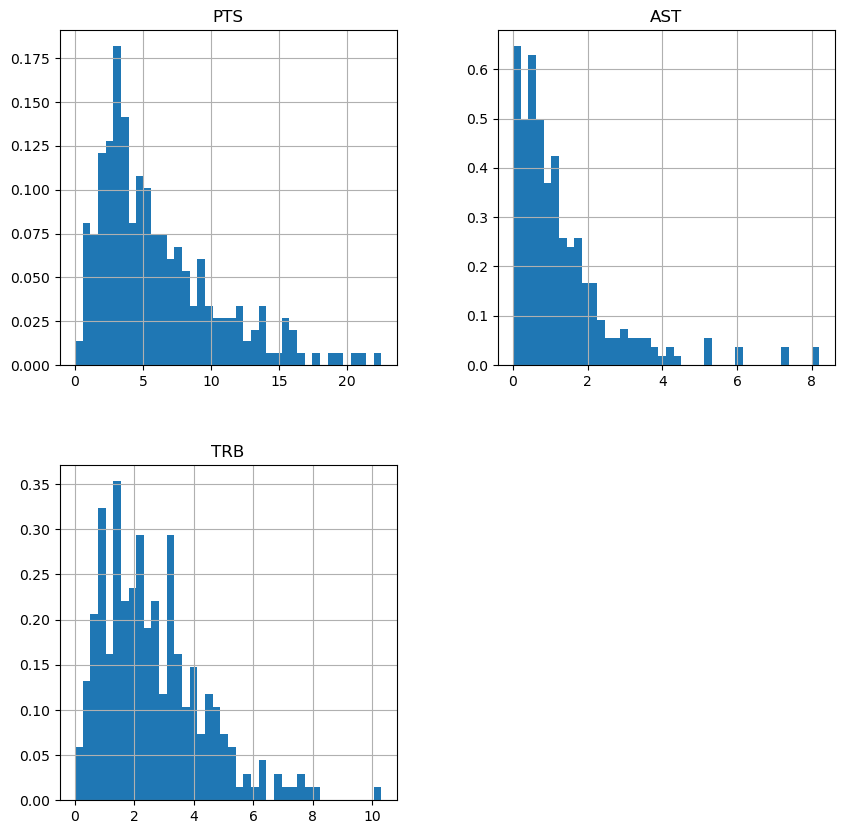

In [54]:
year_1[["PTS","AST","TRB"]].hist(figsize=(10, 10), bins=40,density=True)
plt.show()

* Year 2

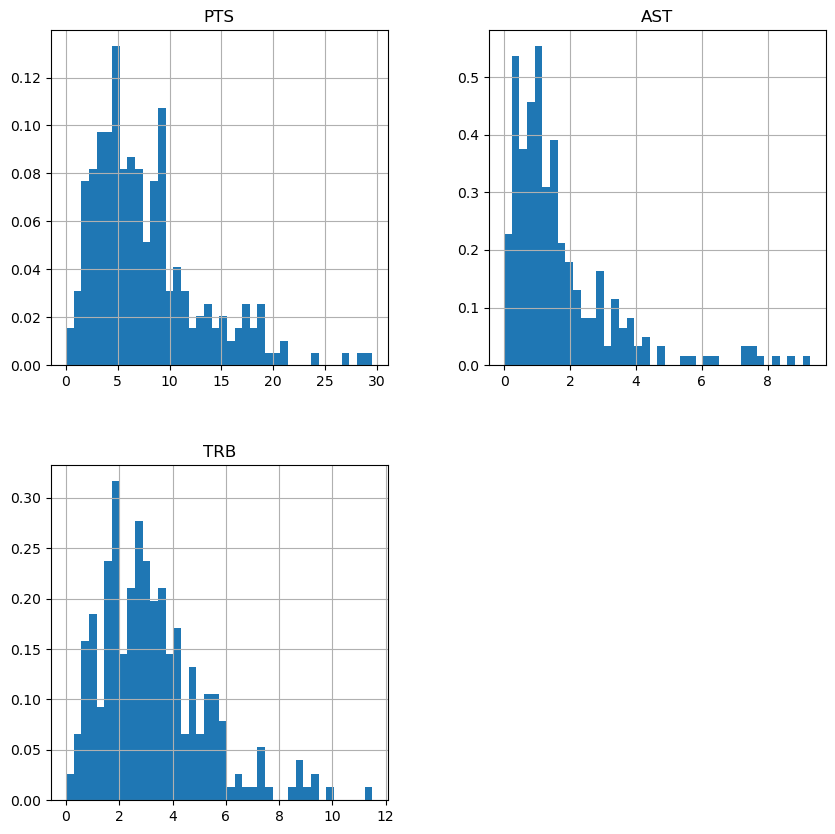

In [52]:
year_2[["PTS","AST","TRB"]].hist(figsize=(10, 10), bins=40,density=True)
plt.show()

* Year 3

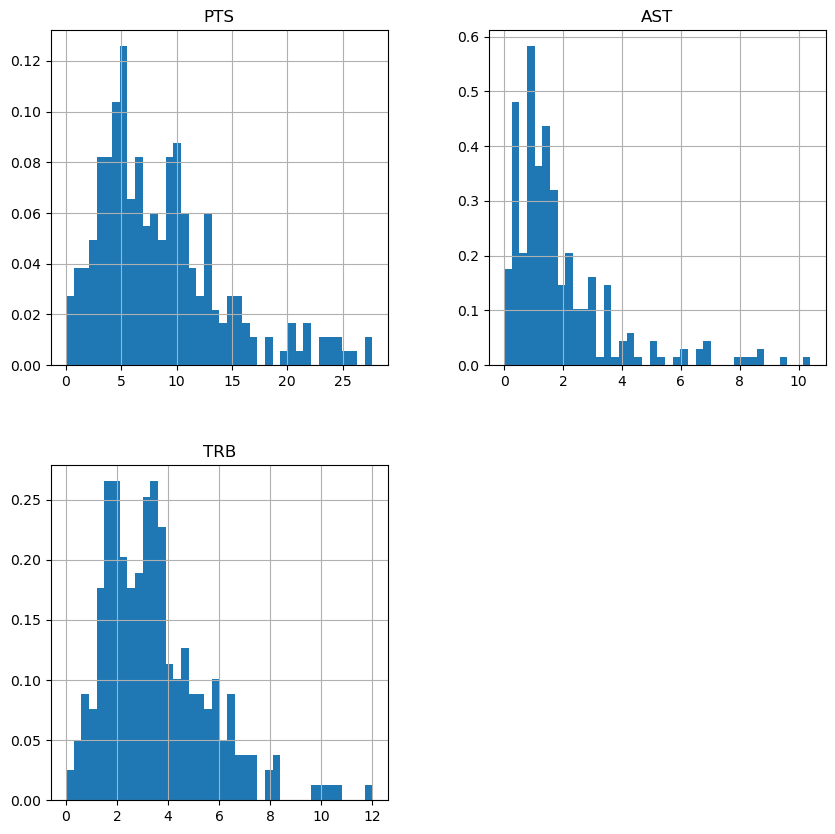

In [53]:
year_3[["PTS","AST","TRB"]].hist(figsize=(10, 10), bins=40,density=True)
plt.show()

The constant growth we saw before is noticeable also in the histograms, the shape of the graphs is pretty similar to a Normal distribution with a mean that increases each. It is pretty clear that there are some outliers and the number of them is higher each year, in fact just a little number of players perform at a elitè level in their rookie season.

## A glimpse of the outliers

* Year 1

In [70]:
Q1_pts_1 = year_1["PTS"].quantile(0.25)
Q3_pts_1 = year_1["PTS"].quantile(0.75)
IQR = Q3_pts_1- Q1_pts_1
# We used the interquartile interval to spot the outliers

PTS_outliers_1 = year_1[["PTS","Player","G"]][(year_1["PTS"] < (Q1_pts_1 - 1.5 * IQR)) | (year_1["PTS"] > (Q3_pts_1 + 1.5 * IQR))]
PTS_outliers_1.sort_values("PTS",ascending=False) # ATTENZIONE AL NUMERO DI PARTITE GIOCATE!!!

,PTS,Player,G
1040,22.5,Zion Williamson,24
1380,21.2,Luka Dončić,72
1913,20.5,Donovan Mitchell,79
516,19.3,Anthony Edwards,72
1459,19.1,Trae Young,81
994,17.8,Ja Morant,67
1431,16.7,Collin Sexton,82
1349,16.3,Deandre Ayton,71
1900,16.1,Kyle Kuzma,77
1937,15.8,Ben Simmons,81


In [69]:
# We do the same with AST and REB

Q1_ast_1 = year_1["AST"].quantile(0.25)
Q3_ast_1 = year_1["AST"].quantile(0.75)
IQR = Q3_ast_1- Q1_ast_1
# We used the interquartile interval to spot the outliers

AST_outliers_1 = year_1[["AST","Player","G"]][(year_1["AST"] < (Q1_ast_1 - 1.5 * IQR)) | (year_1["AST"] > (Q3_ast_1 + 1.5 * IQR))]
AST_outliers_1.sort_values("AST",ascending=False)

,AST,Player,G
1937,8.2,Ben Simmons,81
1459,8.1,Trae Young,81
994,7.3,Ja Morant,67
1838,7.2,Lonzo Ball,52
501,6.1,LaMelo Ball,51
1380,6.0,Luka Dončić,72
532,5.3,Killian Hayes,26
526,5.3,Tyrese Haliburton,58
1939,5.2,Dennis Smith Jr.,69
1867,4.4,De'Aaron Fox,73


In [71]:
Q1_reb_1 = year_1["TRB"].quantile(0.25)
Q3_reb_1 = year_1["TRB"].quantile(0.75)
IQR = Q3_reb_1- Q1_reb_1
# We used the interquartile interval to spot the outliers

REB_outliers_1 = year_1[["TRB","Player","G"]][(year_1["TRB"] < (Q1_reb_1 - 1.5 * IQR)) | (year_1["TRB"] > (Q3_reb_1 + 1.5 * IQR))]
REB_outliers_1.sort_values("TRB",ascending=False)


# ........year 2,3 bla bla

,TRB,Player,G
1349,10.3,Deandre Ayton,71
1937,8.1,Ben Simmons,81
1380,7.8,Luka Dončić,72
1350,7.6,Marvin Bagley III,62
1906,7.5,Lauri Markkanen,68
1855,7.3,John Collins,74
1366,7.0,Wendell Carter Jr.,44
1838,6.9,Lonzo Ball,52


## Example: Luka Dončić

* As we saw from the previous analysis some players seem to perform on a different level, we want our model to predict correctly the careers of players with those type of stats in year 1, we will take a look to the stats of one of the best rookies ever: Luka Dončić and see how different he performed compared to the average rookie stats through year 1,2 and 3

In [ ]:
categories=["PTS","AST","TRB"]
player_outlier = [21.2,6.0,7.8]
average_players=[PTS1,AST1,REB1]


In [96]:
import plotly.graph_objects as go

fig = go.Figure()


fig.add_trace(go.Scatterpolar(
      r=player_outlier,
      theta=categories,
      fill='toself',
      name='Luka Dončić'
))
fig.add_trace(go.Scatterpolar(
      r=average_players,
      theta=categories,
      fill='toself',
      name='Average rookies'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      showline=False,
      color='sandybrown'
    )),
  showlegend=True,
  height=800,  # Altezza del grafico
  width=800,

)

fig.show()


***************************************************************************************************************************************************************************